# 24장 머신러닝 간략히 살펴보기

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/24장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 24.1 특성 벡터
## 24.2 거리 지표

그림 24-6 민코프스키 거리 

In [1]:
def minkowski_dist(v1, v2, p): 
    """v1는 v2 길이가 같은 숫자 배열이라고 가정합니다.
       v1과 v3 사이의 민코프스키 거리를 반환합니다""" 
    dist = 0.0 
    for i in range(len(v1)): 
        dist += abs(v1[i] -v2[i])**p 
    return dist**(1/p) 

그림 24-7 `Animal` 클래스

In [2]:
import numpy as np

class Animal(object): 
    def __init__(self, name, features): 
        """name은 문자열이고 features는 숫자 리스트라고 가정합니다""" 
        self.name = name 
        self.features = np.array(features) 

    def get_name(self): 
        return self.name 

    def get_features(self): 
        return self.features 

    def distance(self, other): 
        """other은 Animal 클래스 객체라고 가정합니다.
           self와 other의 특성 벡터 사이의 유클리드 거리를 반환합니다""" 
        return minkowski_dist(self.get_features(), 
                              other.get_features(), 2)

그림 24-8 동물 간의 거리를 담은 테이블 만들기

In [3]:
import matplotlib.pyplot as plt

def compare_animals(animals, precision): 
    """animals은 Animal 클래스의 리스트이고 pecision은 int >= 0라고 가정합니다.
       animals이 원소 사이 거리를 담은 테이블을 만듭니다""" 
    # 행과 열의 레이블을 준비합니다
    column_labels = [a.get_name() for a in animals] 
    row_labels = column_labels[:] 
    table_vals = [] 
    # 동물 사이의 거리를 계산합니다
    # 각 행마다
    for a1 in animals: 
        row = [] 
        # 각 열마다
        for a2 in animals: 
            distance = a1.distance(a2) 
            row.append(str(round(distance, precision))) 
        table_vals.append(row) 
    # 테이블을 만듭니다
    table = plt.table(rowLabels=row_labels, 
                      colLabels=column_labels, 
                      cellText=table_vals, 
                      cellLoc='center', 
                      loc='center', 
                      colWidths=[0.2]*len(animals)) 
    plt.axis('off') 
    table.scale(1, 2.5) 

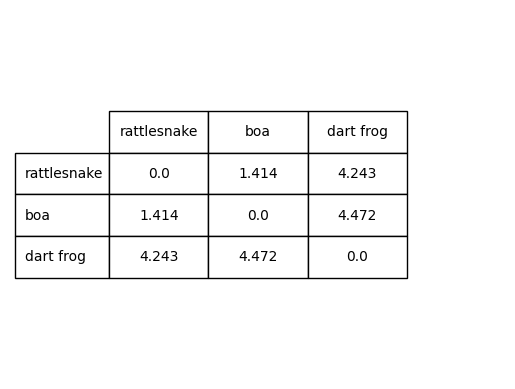

In [4]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0]) 
boa = Animal('boa', [0,1,0,1,0]) 
dart_frog = Animal('dart frog', [1,0,1,0,4]) 
animals = [rattlesnake, boa, dart_frog] 
compare_animals(animals, 3) 

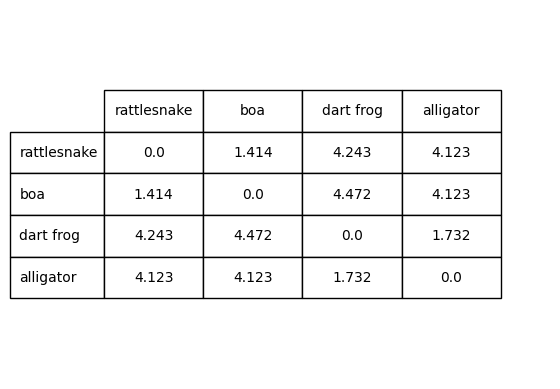

In [5]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0]) 
boa = Animal('boa', [0,1,0,1,0]) 
dart_frog = Animal('dart frog', [1,0,1,0,4]) 
animals = [rattlesnake, boa, dart_frog] 
alligator = Animal('alligator', [1,1,0,1,4]) 
animals.append(alligator) 
compare_animals(animals, 3) 

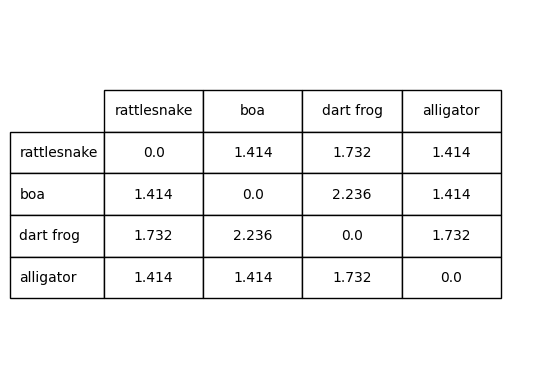

In [6]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0]) 
boa = Animal('boa', [0,1,0,1,0]) 
dart_frog = Animal('dart frog', [1,0,1,0,1]) 
animals = [rattlesnake, boa, dart_frog] 
alligator = Animal('alligator', [1,1,0,1,1]) 
animals.append(alligator) 
compare_animals(animals, 3) 